In [9]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [20]:
import json
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [27]:
f = open(r"C:\Users\ejian\CogWorks-2022-Gausslien-Final-Capstone\Sarcasm Detector\Sarcasm_Headlines_Dataset.json")

file_path1 = r"C:\Users\ejian\CogWorks-2022-Gausslien-Final-Capstone\Sarcasm Detector\Sarcasm_Headlines_Dataset.json"
df = pd.read_json(file_path1,lines=True)
dfArr= np.asarray(df)


In [23]:
dfArr

array([['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
        "former versace store clerk sues over secret 'black code' for minority shoppers",
        0],
       ['https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
        "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
        0],
       ['https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
        "mom starting to fear son's web series closest thing she will have to grandchild",
        1],
       ...,
       ['https://www.huffingtonpost.com/entry/reparations-and-obama_b_5390741.html',
        'reparations and obama', 0],
       ['https://www.huffingtonpost.com/entry/israeli-ban-alarm_us_58d277f3e4b0b22b0d187dcb',
        'israeli ban targeting boycott supporters raises alarm abroad',
        0],
       ['https://www.huffingtonpost.com/entry/gourmet-gifts-for-the-foo_b_6

In [31]:
urls = [sentence for sentence in dfArr[:, 0]]
sentences = [sentence for sentence in dfArr[:, 1]]
labels = [sarcasm for sarcasm in dfArr[:, 2]]


In [33]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [34]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [35]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6669 - accuracy: 0.5758 - val_loss: 0.5983 - val_accuracy: 0.6698 - 3s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4452 - accuracy: 0.8253 - val_loss: 0.3886 - val_accuracy: 0.8389 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3147 - accuracy: 0.8747 - val_loss: 0.3566 - val_accuracy: 0.8509 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2621 - accuracy: 0.8986 - val_loss: 0.3451 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2263 - accuracy: 0.9129 - val_loss: 0.3510 - val_accuracy: 0.8483 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1986 - accuracy: 0.9236 - val_loss: 0.3500 - val_accuracy: 0.8535 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1780 - accuracy: 0.9344 - val_loss: 0.3613 - val_accuracy: 0.8520 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1591 - accuracy: 0.9406 - val_loss: 0.4121 - val_accuracy: 0.8347 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

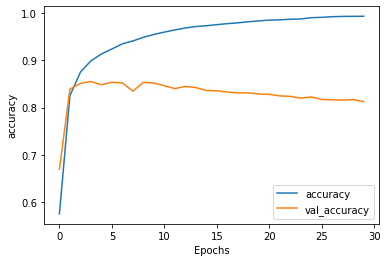

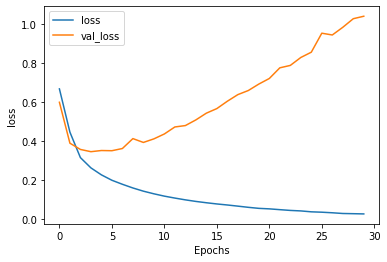

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [52]:
sentence = [""]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 22ms/step
[[0.04216778]]
